In [1]:
import pandas as pd
import tensorflow as tf 
import tensorflow_io as tfio
pd.options.mode.chained_assignment = None

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
check_df = pd.read_csv('/kaggle/input/new-sound-dataset-2024/df_sound_super_ext1.csv')

In [4]:
df = pd.read_csv('/kaggle/input/new-sound-dataset-2024/df_sound_super_ext1.csv')
df.head(5)

,label,MFCCs_0,MFCCs_1,MFCCs_2,MFCCs_3,MFCCs_4,MFCCs_5,MFCCs_6,MFCCs_7,MFCCs_8,...,spectral_contrast_std_3,spectral_contrast_std_4,spectral_contrast_std_5,spectral_contrast_std_6,tonnetz_std_0,tonnetz_std_1,tonnetz_std_2,tonnetz_std_3,tonnetz_std_4,tonnetz_std_5
0,Truck idling Full,-144.266110,147.17151,-49.638912,15.333573,-8.378953,25.929523,-9.700624,12.629977,-24.272520,...,1.907221,1.448494,1.114312,6.783267,0.037209,0.025670,0.027315,0.044734,0.012590,0.014134
1,Truck idling Full,-155.357360,144.67230,-46.065895,18.556850,11.784542,24.411234,-3.243358,20.571308,0.615909,...,1.986655,1.726565,1.379506,4.743701,0.034316,0.033457,0.030612,0.032710,0.018051,0.014341
2,Truck idling Full,-135.089160,120.50888,-21.998446,20.289173,-16.049006,5.310522,-1.421212,6.153967,-8.638702,...,2.033297,1.786614,1.418294,5.573070,0.030168,0.024719,0.032026,0.027985,0.012248,0.014188
3,Truck idling Full,-145.972380,145.63855,-56.518494,14.895403,-5.488753,26.655867,-5.340638,15.659369,-7.542261,...,1.861915,1.680943,1.353896,6.479958,0.029149,0.026572,0.025946,0.029970,0.013266,0.013706
4,Truck idling Full,-115.146996,158.91006,-58.141830,9.406412,-24.740862,30.780817,-12.989754,14.106170,-11.900005,...,2.389258,1.740846,1.157450,7.152780,0.050403,0.065989,0.081200,0.058970,0.032351,0.031634


In [5]:
df['true_number'] = df.index
last_label = 'kekw'
k = 1
for i in range(df.shape[0]):
    if df['label'].loc[i] != last_label:
        k = 1
    df['true_number'].loc[i] = k
    last_label = df['label'].loc[i]
    k += 1

In [6]:
df.label = df.label.apply(lambda x: 'Tram' if x in ['Tram Acceleration Full','Tram Full', 'Tram Ring Full', 'Tram Braking Full'] else x)

In [7]:
df['true_label'] = check_df['label']

In [8]:
def convert_dataset(df1):
    df2 = df1.copy()
    labels = list(zip(list(df2['label'].unique()), range(17)))
    my_dict = {sublist[0]: sublist[1] for sublist in labels}
    df2['label'] = df2.label.apply(lambda x: my_dict[x])
    columns_to_convert = [
    'MFCCs_0', 'MFCCs_1', 'MFCCs_2', 'MFCCs_3', 'MFCCs_4', 'MFCCs_5', 'MFCCs_6', 'MFCCs_7', 'MFCCs_8', 'MFCCs_9',
    'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19',
    'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'MFCCs_23', 'MFCCs_24', 'MFCCs_25', 'MFCCs_26', 'MFCCs_27', 'MFCCs_28', 'MFCCs_29',
    'MFCCs_30', 'MFCCs_31', 'MFCCs_32', 'MFCCs_33', 'MFCCs_34', 'MFCCs_35', 'MFCCs_36', 'MFCCs_37', 'MFCCs_38', 'MFCCs_39',
    'Chroma_0', 'Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6', 'Chroma_7', 'Chroma_8', 'Chroma_9',
    'Chroma_10', 'Chroma_11', 'Mel_0', 'Mel_1', 'Mel_2', 'Mel_3', 'Mel_4', 'Mel_5', 'Mel_6', 'Mel_7', 'Mel_8', 'Mel_9',
    'Mel_10', 'Mel_11', 'Mel_12', 'Mel_13', 'Mel_14', 'Mel_15', 'Mel_16', 'Mel_17', 'Mel_18', 'Mel_19', 'Mel_20', 'Mel_21',
    'Mel_22', 'Mel_23', 'Mel_24', 'Mel_25', 'Mel_26', 'Mel_27', 'Mel_28', 'Mel_29', 'Mel_30', 'Mel_31', 'Mel_32', 'Mel_33',
    'Mel_34', 'Mel_35', 'Mel_36', 'Mel_37', 'Mel_38', 'Mel_39', 'Mel_40', 'Mel_41', 'Mel_42', 'Mel_43', 'Mel_44', 'Mel_45',
    'Mel_46', 'Mel_47', 'Mel_48', 'Mel_49', 'Mel_50', 'Mel_51', 'Mel_52', 'Mel_53', 'Mel_54', 'Mel_55', 'Mel_56', 'Mel_57',
    'Mel_58', 'Mel_59', 'Mel_60', 'Mel_61', 'Mel_62', 'Mel_63', 'Mel_64', 'Mel_65', 'Mel_66', 'Mel_67', 'Mel_68', 'Mel_69',
    'Mel_70', 'Mel_71', 'Mel_72', 'Mel_73', 'Mel_74', 'Mel_75', 'Mel_76', 'Mel_77', 'Mel_78', 'Mel_79', 'Mel_80', 'Mel_81',
    'Mel_82', 'Mel_83', 'Mel_84', 'Mel_85', 'Mel_86', 'Mel_87', 'Mel_88', 'Mel_89', 'Mel_90', 'Mel_91', 'Mel_92', 'Mel_93',
    'Mel_94', 'Mel_95', 'Mel_96', 'Mel_97', 'Mel_98', 'Mel_99', 'Mel_100', 'Mel_101', 'Mel_102', 'Mel_103', 'Mel_104',
    'Mel_105', 'Mel_106', 'Mel_107', 'Mel_108', 'Mel_109', 'Mel_110', 'Mel_111', 'Mel_112', 'Mel_113', 'Mel_114', 'Mel_115',
    'Mel_116', 'Mel_117', 'Mel_118', 'Mel_119', 'Mel_120', 'Mel_121', 'Mel_122', 'Mel_123', 'Mel_124', 'Mel_125', 'Mel_126',
    'Mel_127', 'Contrast_0', 'Contrast_1', 'Contrast_2', 'Contrast_3', 'Contrast_4', 'Contrast_5', 'Contrast_6', 'Tonnetz_0',
    'Tonnetz_1', 'Tonnetz_2', 'Tonnetz_3', 'Tonnetz_4', 'Tonnetz_5'
    ]

    # Convert specified columns to float64
    df2[columns_to_convert] = df2[columns_to_convert].astype('float64')
    
    return df2, my_dict

In [9]:
df, names = convert_dataset(df)
df.groupby('label').count().T.head(1)

label,0,1,2,3,4,5,6,7,8,9,10,11,12,13
MFCCs_0,346,485,210,1231,240,492,204,208,471,296,201,304,486,200


In [10]:
names_rev = {j:i for i, j in names.items()}
names_rev

{0: 'Truck idling Full',
 1: 'Siren 4 Full',
 2: 'Car Idling Full',
 3: 'Tram',
 4: 'Truck Acceleration Full',
 5: 'Moto Acceleration Full',
 6: 'Car Horn Full',
 7: 'Truck Horn Full',
 8: 'Siren 5 Full',
 9: 'Truck Braking Full',
 10: 'Car acceleration Full',
 11: 'Moto Idling Full',
 12: 'Siren 1 Full',
 13: 'Car braking Full'}

In [11]:
df

,label,MFCCs_0,MFCCs_1,MFCCs_2,MFCCs_3,MFCCs_4,MFCCs_5,MFCCs_6,MFCCs_7,MFCCs_8,...,spectral_contrast_std_5,spectral_contrast_std_6,tonnetz_std_0,tonnetz_std_1,tonnetz_std_2,tonnetz_std_3,tonnetz_std_4,tonnetz_std_5,true_number,true_label
0,0,-144.266110,147.17151,-49.638912,15.333573,-8.378953,25.929523,-9.700624,12.629977,-24.272520,...,1.114312,6.783267,0.037209,0.025670,0.027315,0.044734,0.012590,0.014134,1,Truck idling Full
1,0,-155.357360,144.67230,-46.065895,18.556850,11.784542,24.411234,-3.243358,20.571308,0.615909,...,1.379506,4.743701,0.034316,0.033457,0.030612,0.032710,0.018051,0.014341,2,Truck idling Full
2,0,-135.089160,120.50888,-21.998446,20.289173,-16.049006,5.310522,-1.421212,6.153967,-8.638702,...,1.418294,5.573070,0.030168,0.024719,0.032026,0.027985,0.012248,0.014188,3,Truck idling Full
3,0,-145.972380,145.63855,-56.518494,14.895403,-5.488753,26.655867,-5.340638,15.659369,-7.542261,...,1.353896,6.479958,0.029149,0.026572,0.025946,0.029970,0.013266,0.013706,4,Truck idling Full
4,0,-115.146996,158.91006,-58.141830,9.406412,-24.740862,30.780817,-12.989754,14.106170,-11.900005,...,1.157450,7.152780,0.050403,0.065989,0.081200,0.058970,0.032351,0.031634,5,Truck idling Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,3,-55.322050,149.92593,-35.669090,18.643238,-27.737831,-2.107041,-19.892690,-10.267549,-30.989792,...,1.566280,6.207625,0.038826,0.036471,0.051832,0.048598,0.019317,0.019746,256,Tram Braking Full
5370,3,-106.195060,136.17975,-19.159885,28.127000,-25.690546,13.437476,-7.001718,5.659176,-21.296406,...,2.436596,4.746371,0.024924,0.042863,0.033793,0.031289,0.016763,0.015399,257,Tram Braking Full
5371,3,-51.066563,119.13133,-21.935280,8.466954,-30.965471,13.782279,-43.744606,12.796017,-24.665610,...,4.471753,6.451826,0.068446,0.052955,0.068483,0.074425,0.029831,0.029375,258,Tram Braking Full
5372,3,-99.342460,133.52116,-24.095839,18.666077,-40.901894,16.885904,-5.738141,9.589697,-3.040067,...,1.560880,5.277188,0.050063,0.045107,0.044877,0.043609,0.021101,0.016636,259,Tram Braking Full


In [12]:
df_to_train = df#.drop(imp[imp.Importance < 0].Feature, axis=1)
df.shape, df_to_train.shape

((5374, 389), (5374, 389))

In [13]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

df_to_train = df_to_train

target_column = 'label'
X = df_to_train.drop(target_column, axis=1)
y = df_to_train[target_column]

X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train_.drop(['true_label', 'true_number'], axis=1)
X_test = X_test_.drop(['true_label', 'true_number'], axis=1)

In [14]:
model = CatBoostClassifier()   
model.load_model('/kaggle/input/sound-models2024/cat_model.cdm')
y_pred = model.predict(X_test)

# Оценка точности модели на тестовом наборе
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9720930232558139


In [15]:
new_model = tf.keras.models.load_model('/kaggle/input/sound-models2024/model2024', compile=False)

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 1)      10        
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 1)      10        
                                                                 
 flatten (Flatten)           (None, 376211)            0         
                                                                 
 dense (Dense)               (None, 128)               48155136  
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 48155672 (183.70 MB)
Trainable params: 48155672 (183.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
X_test_['y_pred'] = y_pred

In [17]:
new_test = X_test_[X_test_.y_pred == 3]
new_test.head()

,MFCCs_0,MFCCs_1,MFCCs_2,MFCCs_3,MFCCs_4,MFCCs_5,MFCCs_6,MFCCs_7,MFCCs_8,MFCCs_9,...,spectral_contrast_std_6,tonnetz_std_0,tonnetz_std_1,tonnetz_std_2,tonnetz_std_3,tonnetz_std_4,tonnetz_std_5,true_number,true_label,y_pred
5293,-123.43969,143.06860,-16.874271,19.817492,-27.368700,10.926845,-15.790242,-7.809354,-8.949457,-11.001345,...,5.422277,0.032630,0.035340,0.053990,0.047659,0.022075,0.022877,180,Tram Braking Full,3
3203,-144.20706,124.62646,-49.702830,13.269438,0.315943,17.878613,-11.518782,15.114870,0.864206,11.755150,...,5.566611,0.051481,0.022515,0.039174,0.033780,0.012650,0.016364,288,Truck Braking Full,3
3901,-75.23330,133.49069,-33.443930,5.902052,-33.049230,-2.164439,-19.099316,-2.545413,-15.152843,0.517577,...,5.170280,0.033461,0.038059,0.056828,0.048057,0.022101,0.024992,489,Tram Full,3
2275,-99.70654,175.20302,-76.415985,15.159926,-19.636858,2.748010,-11.257873,8.096496,-8.333303,0.994788,...,5.966342,0.023019,0.037391,0.034767,0.053102,0.016443,0.014635,39,Truck Horn Full,3
3816,-179.38918,173.73329,-28.979647,8.059479,-9.382972,15.346871,-12.143729,13.754755,-17.857512,5.679297,...,5.476228,0.037797,0.032491,0.036192,0.038126,0.018054,0.014658,404,Tram Full,3


In [18]:
label_change = {0: 'Tram Acceleration Full',
                1: 'Tram Full', 
                2: 'Tram Ring Full',
                3: 'Tram Braking Full'}

In [19]:
new_test['file_name'] = new_test.true_label + '/' + 'segment_' + new_test.true_number.astype(str) + '.wav'

In [20]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav


def preprocess_for_predict(file_path): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    spectrogram = tf.reshape(spectrogram, (1,spectrogram.shape[0], spectrogram.shape[1], spectrogram.shape[2]))
    return spectrogram

In [21]:
jura_y_pred = []
for name in new_test.file_name:
    jura_y_pred.append(new_model.predict(preprocess_for_predict(f'/kaggle/input/new-sounds-2024/new sounds/{name}'), verbose=False).argmax())

In [22]:
new_test['jura_y_pred'] = jura_y_pred

In [23]:
new_test['jura_y_pred'] = new_test.jura_y_pred.apply(lambda x: label_change[x])

In [24]:
new_test_no_3 = X_test_[X_test_.y_pred != 3]

In [25]:
new_test_no_3['jura_y_pred'] = new_test_no_3.y_pred.apply(lambda x: names_rev[int(x)])

In [26]:
all_test = pd.concat([new_test, new_test_no_3])

In [27]:
keys_ = ['Car Horn', 'Car Idling', 'Car acceleration', 'Car braking', 'Moto Acceleration', 'Moto Idling', 'Siren 1',
         'Siren 4', 'Siren 5', 'Tram Acceleration', 'Tram Braking', 'Tram', 'Tram Ring', 'Truck Acceleration', 'Truck Braking',
         'Truck Horn', 'Truck idling']

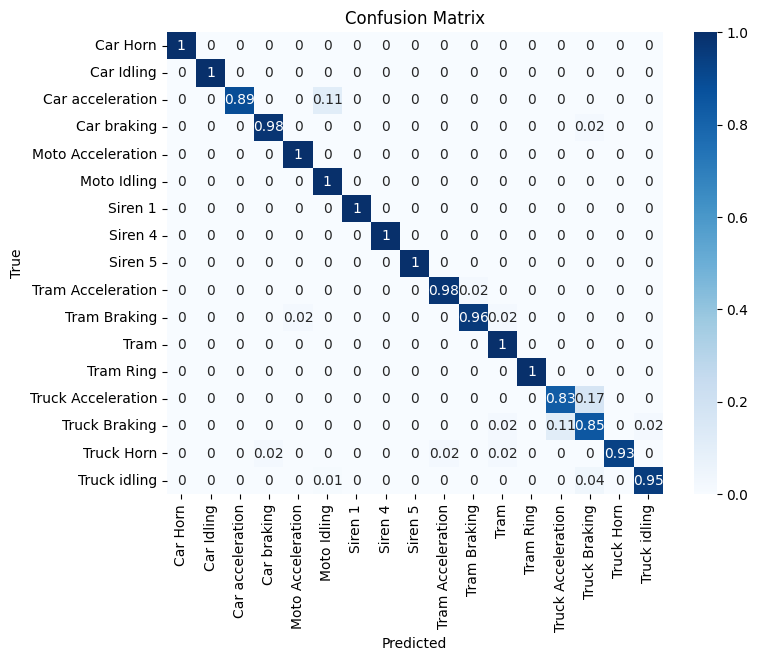

                         precision    recall  f1-score   support

          Car Horn Full       1.00      1.00      1.00        44
        Car Idling Full       1.00      1.00      1.00        40
  Car acceleration Full       1.00      0.89      0.94        37
       Car braking Full       0.98      0.98      0.98        44
 Moto Acceleration Full       0.99      1.00      0.99        85
       Moto Idling Full       0.92      1.00      0.96        61
           Siren 1 Full       1.00      1.00      1.00       104
           Siren 4 Full       1.00      1.00      1.00       109
           Siren 5 Full       1.00      1.00      1.00        83
 Tram Acceleration Full       0.98      0.98      0.98        57
      Tram Braking Full       0.98      0.96      0.97        54
              Tram Full       0.97      1.00      0.98        98
         Tram Ring Full       1.00      1.00      1.00        32
Truck Acceleration Full       0.88      0.83      0.86        54
     Truck Braking Full 

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
conf_matrix = confusion_matrix(all_test.true_label, all_test.jura_y_pred)#, labels=all_test.true_label.unique())
conf_matrix = np.round(conf_matrix / np.sum(conf_matrix, axis=1).reshape(-1, 1),2)

# Визуализация матрицы сопряженности
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=keys_, yticklabels=keys_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(all_test.true_label, all_test.jura_y_pred))